Example lbp application on Cifar10 
Akgun, Devrim. "A PyTorch Operations Based Approach for Computing Local Binary Patterns." U. Porto Journal of Engineering 7.4 (2021): 61-69.
https://journalengineering.fe.up.pt/index.php/upjeng/article/view/2183-6493_007-004_0005/567

In [1]:
from lib.lbplib import lbp_py,lbp_pt
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
#Compute LBP using Python operations
def py_extract_lbp_rgb(x_train):
    [N,Rows,Cols,Channels]=x_train.shape    
    x_train_lbp=np.zeros(shape=(N,Rows,Cols,Channels),dtype='uint8')    
    for i in range(N):
        x_train_lbp[i,:,:,0]=lbp_py(x_train[i,:,:,0])
        x_train_lbp[i,:,:,1]=lbp_py(x_train[i,:,:,1])
        x_train_lbp[i,:,:,2]=lbp_py(x_train[i,:,:,2])         
    return x_train_lbp

In [3]:
#Compute LBP using PyTorch operations
def torch_extract_lbp_rgb(x_train):
    [N,Rows,Cols,Channels]=x_train.shape
    x_train_lbp=np.zeros(shape=(N,Rows,Cols,Channels),dtype='uint8') 
    x_train_lbp[:,:,:,0]=lbp_pt(x_train[:,:,:,0]).numpy()
    x_train_lbp[:,:,:,1]=lbp_pt(x_train[:,:,:,1]).numpy()
    x_train_lbp[:,:,:,2]=lbp_pt(x_train[:,:,:,2]).numpy()
    return x_train_lbp

In [4]:
#Use Cifar10 for the example
trainset = torchvision.datasets.CIFAR10(root='./data', download=True)

#use first 200 images for the test
x_train=trainset.data[:200,:,:,:]

Files already downloaded and verified


In [5]:
# 1- Extract lbp features for the selected images using PyTorch ---------------
start_time   = time.time() 

# process all images using PyTorch
x_train_pt =torch.from_numpy(x_train) 

x_train_lbp_pt = torch_extract_lbp_rgb(x_train_pt) 

elapsed_pt = time.time() - start_time
print('PyTorch elapsed_time=',elapsed_pt)

PyTorch elapsed_time= 0.024001121520996094


In [6]:
# 2- Extract lbp features for the selected images using Python-----------------
start_time   = time.time()

# process all images using Python
x_train_lbp_py = py_extract_lbp_rgb(x_train) 

elapsed_py = time.time() - start_time
print('Python elapsed_time=',elapsed_py)   


Python elapsed_time= 5.376731634140015


In [7]:
# Check error
print('error=',np.sum(x_train_lbp_py-x_train_lbp_pt))

error= 0


<Figure size 640x480 with 0 Axes>

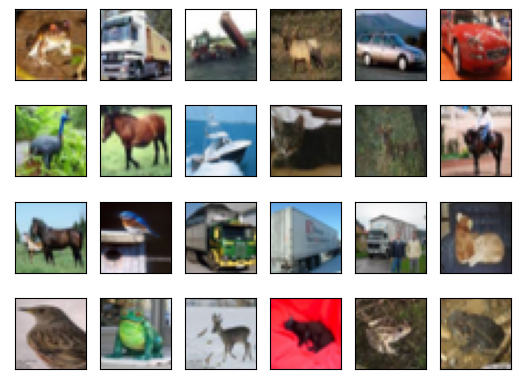

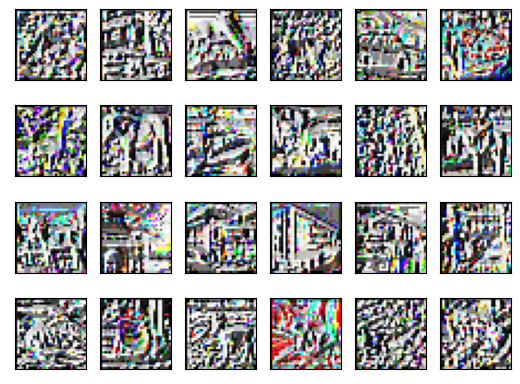

In [8]:
# Example images---------------------------------------------------------------
# Input images
plt.figure(1)
figs, axes = plt.subplots(4, 6)
for i in range(4):
    for j in range(6): 
        axes[i, j].imshow(x_train[i*6+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

# LBP transformed images
plt.figure(2)
figs, axes = plt.subplots(4, 6)
for i in range(4):
    for j in range(6): 
        axes[i, j].imshow(x_train_lbp_pt[i*6+j,:,:,:])
        #axes[i, j].imshow(x_train_lbp_py[i*6+j,:,:,:])
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])